In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from scipy.optimize import curve_fit
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

1(a) - Test for normality of residuals

1(b) 
- checking the accuracy of the model
- Fitting of SLR and MLR (regression), testing of hypothesis and Confidence interval 
- Detection and treatment of outliers
- multicollinearity
- fitting of non linear regression model

Important topics for regression LAB FAT

## 1.Fitting of SLR 

In [190]:
df = pd.read_excel('Sales_data.xlsx')
df

,S. N,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [191]:
df = sm.add_constant(df)
model_tv = sm.OLS(df['Sales'], df[['const','TV']]).fit() #Single variable
print(model_tv.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     30.82
Date:                Thu, 02 May 2024   Prob (F-statistic):           7.14e-05
Time:                        01:13:21   Log-Likelihood:                -39.724
No. Observations:                  16   AIC:                             83.45
Df Residuals:                      14   BIC:                             84.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8154      1.348      5.054      0.0

C:\Users\kings\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [192]:
print(f"Sales = {model_tv.params[0]} + {model_tv.params[1]}*TV")

Sales = 6.815427538794577 + 0.053860565437674715*TV


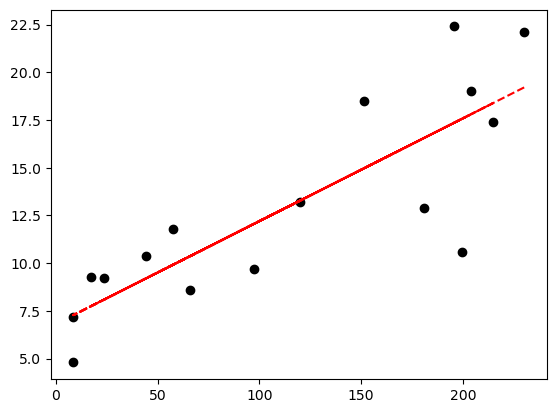

In [193]:
#fitting for TV
plt.scatter(df['TV'], df['Sales'], color='Black')
plt.plot(df['TV'],model_tv.fittedvalues, '--r' )
plt.show()

## 2.Fitting of MLR

In [128]:
model = sm.OLS(df['Sales'], df[['const', 'TV', 'Radio', 'Newspaper']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     46.06
Date:                Wed, 01 May 2024   Prob (F-statistic):           7.37e-07
Time:                        23:05:13   Log-Likelihood:                -28.817
No. Observations:                  16   AIC:                             65.63
Df Residuals:                      12   BIC:                             68.72
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7255      1.074      2.537      0.0

C:\Users\kings\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [129]:
model_Radio = sm.OLS(df['Sales'], df[['const', 'Radio']]).fit()
model_New = sm.OLS(df['Sales'], df[['const', 'Newspaper']]).fit()

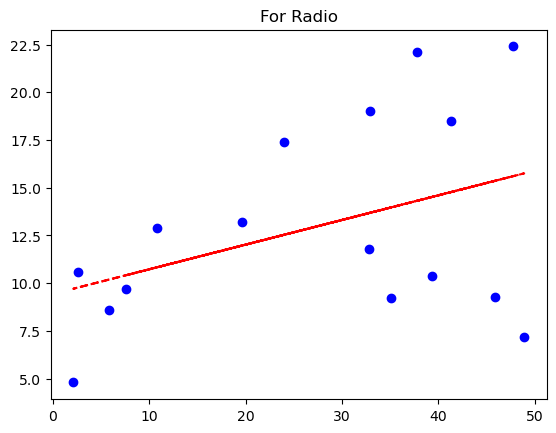

In [135]:
plt.scatter(df['Radio'], df['Sales'], color='Blue')
plt.plot(df['Radio'], model_Radio.fittedvalues, '--r')
plt.title('For Radio')
plt.show()

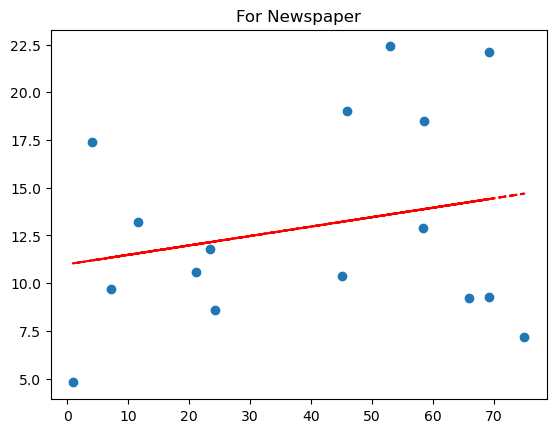

In [137]:
plt.scatter(df['Newspaper'], df['Sales'])
plt.plot(df['Newspaper'], model_New.fittedvalues, '--r')
plt.title('For Newspaper')
plt.show()

## 3.Testing of hypothesis and Confidence interval 

In [138]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     46.06
Date:                Wed, 01 May 2024   Prob (F-statistic):           7.37e-07
Time:                        23:12:30   Log-Likelihood:                -28.817
No. Observations:                  16   AIC:                             65.63
Df Residuals:                      12   BIC:                             68.72
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7255      1.074      2.537      0.0

C:\Users\kings\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Sales =  2.75 + (0.056)* TV + (0.18)* Radio - (0.031)* Newspaper
##### Conclusion

- By looking at the model we can say that when the regression coefficients are constant (or Zero) there will be an average increase in the sales of 2.72 units, when one unit change in TV the average increase will be by 0.05 units in sales, when one unit change in Radio the avg change will by 0.18 units in sales and when one unit change in Newspaper the avg decrease by -0.031 .

- The p-values of Tv and Radio which are less the 0.05 that shows there is statistically significant association between the sales, TV and Radio (Hypothesis ?? ) where as the p-value of Newspaper is 0.228 which greater than 0.05 that shows there statistically insignificant association between Sales and Newspaper.

- R-square tells us that the 92% of the variation in sales can be determinde by the TV , Radio and Newspaper.

Confidence interval - [0.025 , 0.975]

## 4. Checking the accuracy of the model

In [146]:
print(f"Accuracy of the model {(model.rsquared)*100}%") 

Accuracy of the model 92.0095463646288%


In [151]:
from sklearn.metrics import mean_squared_error as mse

In [158]:
print("Model accuracy :", (100 - mse(df['Sales'],model.fittedvalues)), "%")

Model accuracy : 97.85256870676494 %


## 5. Detection and treatment of outliers

In [165]:
df = pd.read_csv('soft_drink.csv')
df

,obs,Delivery Time,Number of Cases,Distance
0,1,16.68,7,560
1,2,11.50,3,220
2,3,12.03,3,340
3,4,14.88,4,80
4,5,13.75,6,150
5,6,18.11,7,330
6,7,8.00,2,110
7,8,17.83,7,210
8,9,79.24,30,1460
9,10,21.50,5,605


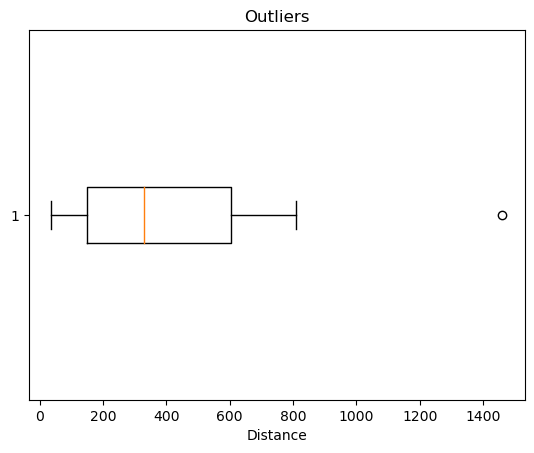

In [170]:
plt.boxplot(df['Distance'], vert=False)
plt.xlabel('Distance')
plt.title('Outliers')
plt.show()

In [177]:
## Z Score
def detect (x):
    outliers = []
    th = 2
    mean = np.mean(x)
    std = np.std(x)
    for i in x:
        z_score = (i - mean)/ std
        if (np.abs(z_score) > th):
            outliers.append(i)
    return outliers

In [178]:
val = detect(df['Distance'])
print(val)

[1460]


In [182]:
## treatment 
median = np.median(df['Distance'])
df['Distance'] = df['Distance'].copy()
for i in val :
    df['Fixed Distance'] = np.where(df['Distance'] == i, median, df['Distance'])
df

,obs,Delivery Time,Number of Cases,Distance,Fixed Distance
0,1,16.68,7,560,560.0
1,2,11.50,3,220,220.0
2,3,12.03,3,340,340.0
3,4,14.88,4,80,80.0
4,5,13.75,6,150,150.0
5,6,18.11,7,330,330.0
6,7,8.00,2,110,110.0
7,8,17.83,7,210,210.0
8,9,79.24,30,1460,330.0
9,10,21.50,5,605,605.0


In [184]:
p10 = np.percentile(df['Distance'], 10)
p90 = np.percentile(df['Distance'], 90)
b = np.where(df['Distance']< p10, p10, df['Distance'])
b = np.where(b>p90, p90, b)
df['Percentile Treated'] = b
df

,obs,Delivery Time,Number of Cases,Distance,Fixed Distance,Percentile Treated
0,1,16.68,7,560,560.0,560.0
1,2,11.50,3,220,220.0,220.0
2,3,12.03,3,340,340.0,340.0
3,4,14.88,4,80,80.0,118.8
4,5,13.75,6,150,150.0,150.0
5,6,18.11,7,330,330.0,330.0
6,7,8.00,2,110,110.0,118.8
7,8,17.83,7,210,210.0,210.0
8,9,79.24,30,1460,330.0,773.6
9,10,21.50,5,605,605.0,605.0


## 6. Test for normality of residuals

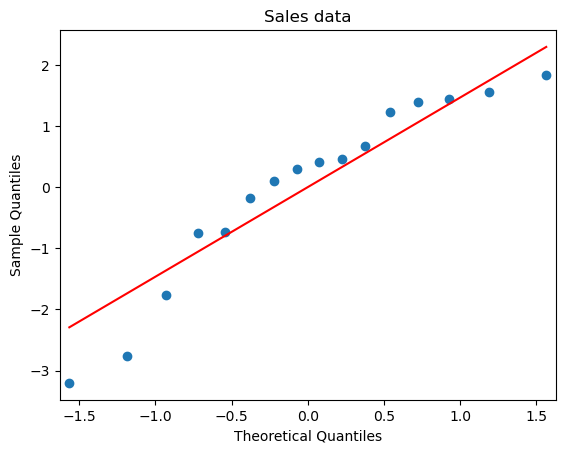

In [198]:
sm.qqplot(model.resid, line='s') 
plt.title('Sales data')
plt.show()

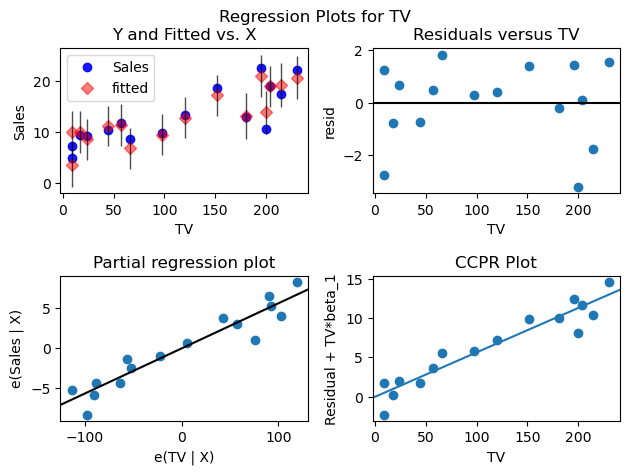

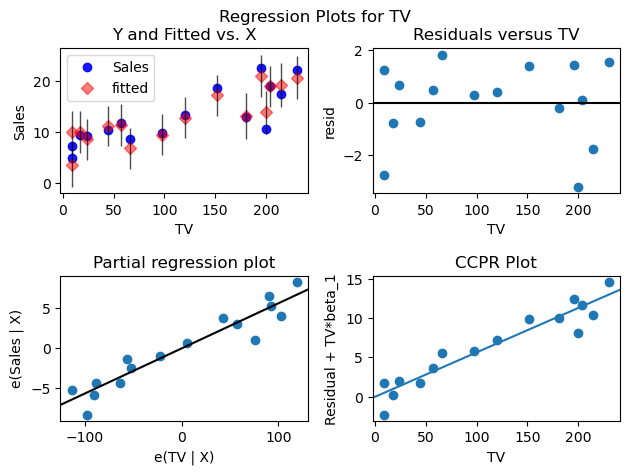

In [200]:
sm.graphics.plot_regress_exog(model, 'TV')

## 7. Multicollinearity

In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

In [226]:
df = pd.read_excel('IQ_Score.xlsx')
df

,Student,Hours spent studying,Exam Score,IQ score,Hours spent sleeping,School rating
0,Student #1,1,89,85,7,73
1,Student #2,3,60,131,5,75
2,Student #3,3,75,100,7,84
3,Student #4,1,21,80,8,64
4,Student #5,3,72,82,8,77
5,Student #6,3,60,88,9,92
6,Student #7,1,21,116,9,62
7,Student #8,1,24,130,7,74
8,Student #9,2,44,98,9,74
9,Student #10,2,48,130,8,79


C:\Users\kings\AppData\Local\Temp\ipykernel_10640\1187244687.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, )


<Axes: >

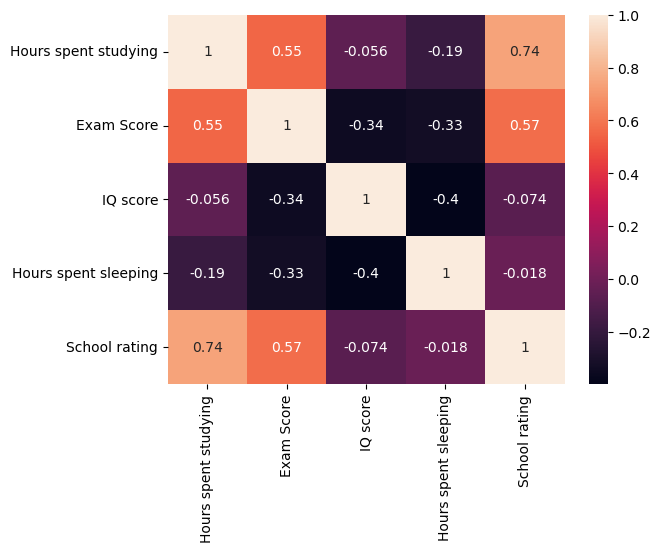

In [227]:
sns.heatmap(df.corr(), annot=True, )

In [228]:
x = df.drop(['Student', 'School rating'], axis=1 )
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns

print(vif)

   VIF Factor              features
0    8.867788  Hours spent studying
1    7.870290            Exam Score
2   13.760562              IQ score
3   14.239637  Hours spent sleeping


In [229]:
pca = PCA(n_components=1) #object creation
df['PCA'] = pca.fit_transform(df[['IQ score', 'Hours spent sleeping']])
df

,Student,Hours spent studying,Exam Score,IQ score,Hours spent sleeping,School rating,PCA
0,Student #1,1,89,85,7,73,-18.977914
1,Student #2,3,60,131,5,75,27.056690
2,Student #3,3,75,100,7,84,-3.982177
3,Student #4,1,21,80,8,64,-24.000331
4,Student #5,3,72,82,8,77,-22.000900
5,Student #6,3,60,88,9,92,-16.026443
6,Student #7,1,21,116,9,62,11.965600
7,Student #8,1,24,130,7,74,26.009298
8,Student #9,2,44,98,9,74,-6.029285
9,Student #10,2,48,130,8,79,25.985460


In [232]:
vif_pca= pd.DataFrame()
y = df.drop(['Student', 'School rating'], axis=1 )

vif_pca['VIF Factor'] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif_pca['feature']= y.columns
vif_pca

,VIF Factor,feature
0,1.489534,Hours spent studying
1,2.247679,Exam Score
2,109.714078,IQ score
3,73.377535,Hours spent sleeping
4,8.835590,PCA


## 8. Fitting of non linear regression model

In [238]:
from scipy.optimize import curve_fit

In [239]:
data = pd.read_excel('Passenger.xlsx')
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


<Axes: >

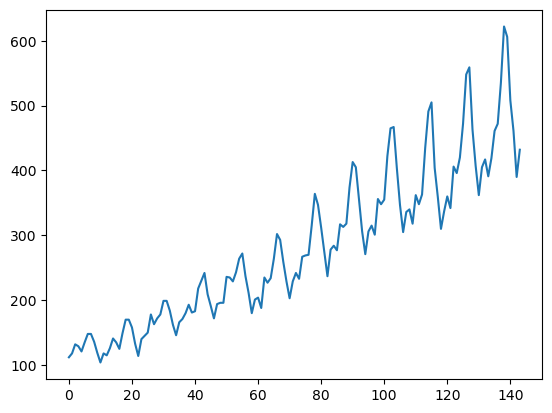

In [241]:
data['Passengers'].plot()

In [246]:
def cubic_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d


In [247]:
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c


In [251]:
import math

def sine_func(x, a, b, c):
    return a * np.sin(b * x) + c


In [255]:

def logarithmic_func(x, a, b):
    return a + b * np.log(x)


In [277]:
sample = data['Passengers'][:80]

In [282]:
popt, pcov = curve_fit(quadratic_func, sample.index, sample)
x = np.linspace(0, len(sample.index), 100)
y = quadratic_func(x, *popt)

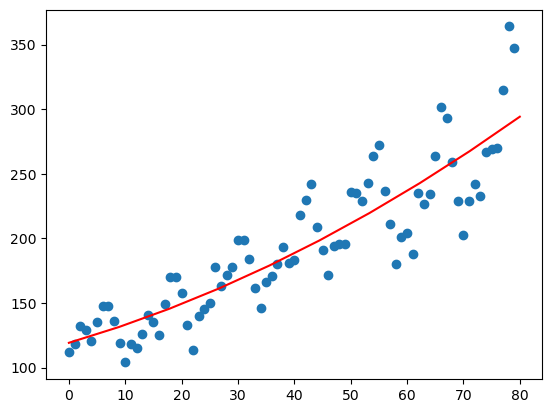

In [281]:
plt.scatter(sample.index, sample)
plt.plot(x, y, '-r')
plt.show()

In [263]:
pcov

array([[ 1.61036549e-05, -1.59426184e-03,  2.60396102e-02],
       [-1.59426184e-03,  1.68563399e-01, -3.10912947e+00],
       [ 2.60396102e-02, -3.10912947e+00,  7.73428503e+01]])

## EXP2. 
### Residual analysis and forecast accuracy for a given data set.

In [46]:
d2 = pd.read_excel('House_data.xlsx')
d2 = sm.add_constant(d2)
d2

,const,Area,Bedrooms,Age,Price
0,1.0,2600,3,20,550000
1,1.0,3000,4,15,565000
2,1.0,3200,3,18,610000
3,1.0,3600,3,30,595000
4,1.0,4000,5,8,760000
5,1.0,4100,6,8,810000


##### Single Variable


In [73]:

model = sm.OLS(d2['Price'], d2[['const', 'Area']]).fit()#define the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     17.35
Date:                Wed, 01 May 2024   Prob (F-statistic):             0.0141
Time:                        20:28:39   Log-Likelihood:                -72.543
No. Observations:                   6   AIC:                             149.1
Df Residuals:                       4   BIC:                             148.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.669e+04   1.39e+05      0.552      0.6

C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [74]:
d2['Residuals'] = model.resid #Residual values
d2

,const,Area,Bedrooms,Age,Price,Residuals
0,1.0,2600,3,20,550000,38302.796528
1,1.0,3000,4,15,565000,-13621.022179
2,1.0,3200,3,18,610000,-2082.931533
3,1.0,3600,3,30,595000,-84006.750241
4,1.0,4000,5,8,760000,14069.431051
5,1.0,4100,6,8,810000,47338.476374


Residual Plot

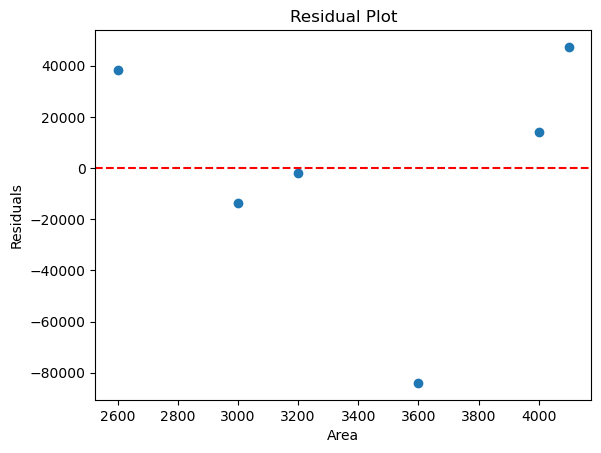

In [81]:
plt.scatter(d2['Area'], d2['Residuals'])
plt.axhline(y=0, color= 'red', linestyle= '--')
plt.title('Residual Plot')
plt.xlabel('Area')
plt.ylabel('Residuals')
plt.show()

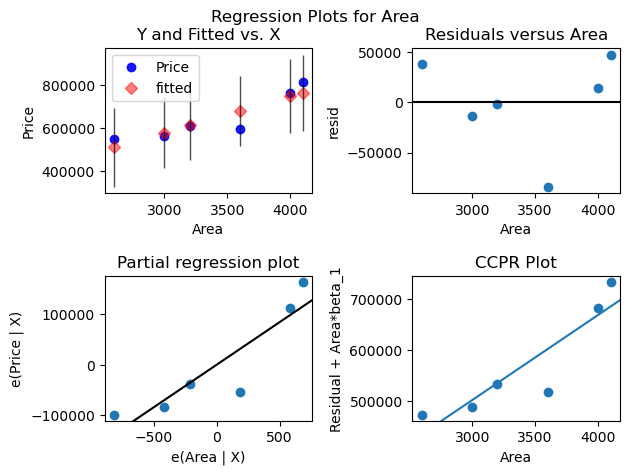

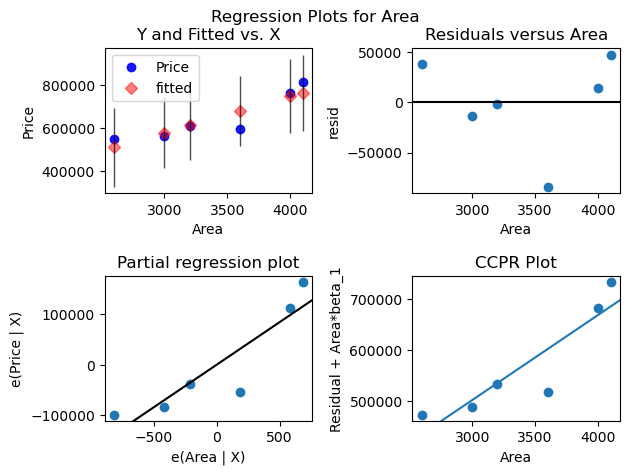

In [86]:
sm.graphics.plot_regress_exog(model,'Area')

###### Multiple Variable


In [72]:
model_mul = sm.OLS(d2['Price'], d2[['Area', 'Bedrooms', 'Age']]).fit()

print(model_mul.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              386.7
Date:                Wed, 01 May 2024   Prob (F-statistic):                    0.000222
Time:                        20:28:08   Log-Likelihood:                         -70.996
No. Observations:                   6   AIC:                                      148.0
Df Residuals:                       3   BIC:                                      147.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


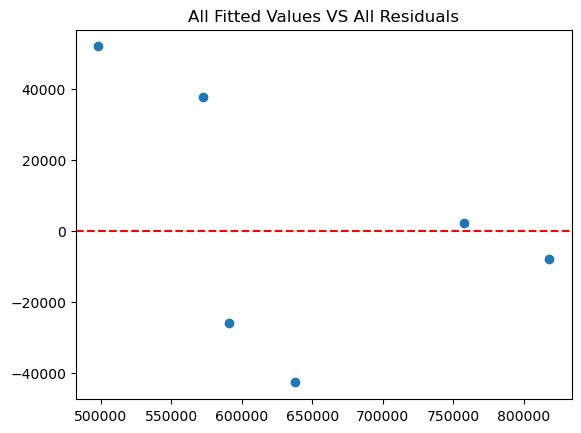

In [94]:

plt.scatter(model_mul.fittedvalues, model_mul.resid)
plt.axhline(y=0, color='Red', linestyle= '--')
plt.title('All Fitted Values VS All Residuals')
plt.show()

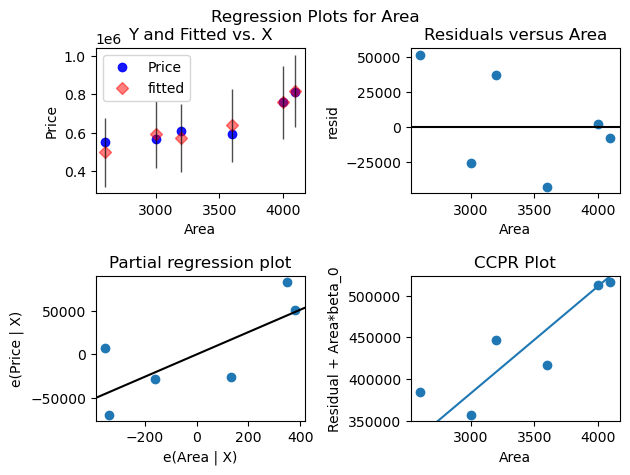

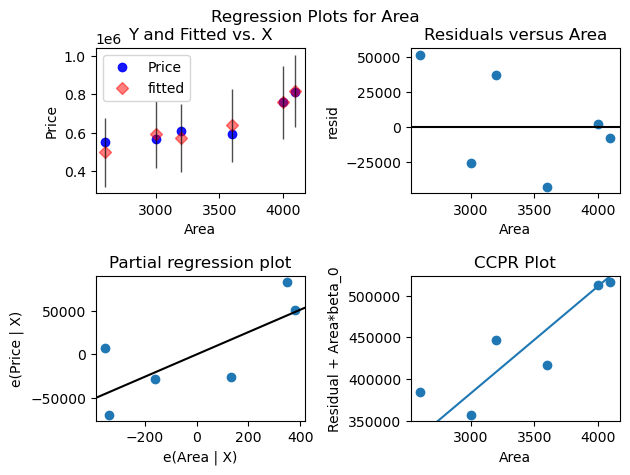

In [91]:
sm.graphics.plot_regress_exog(model_mul,'Area')

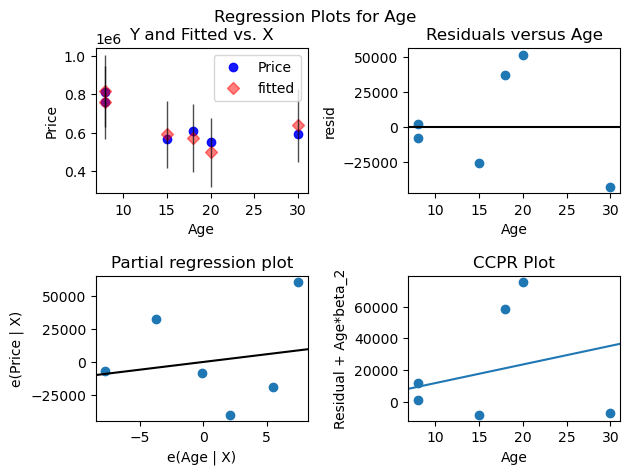

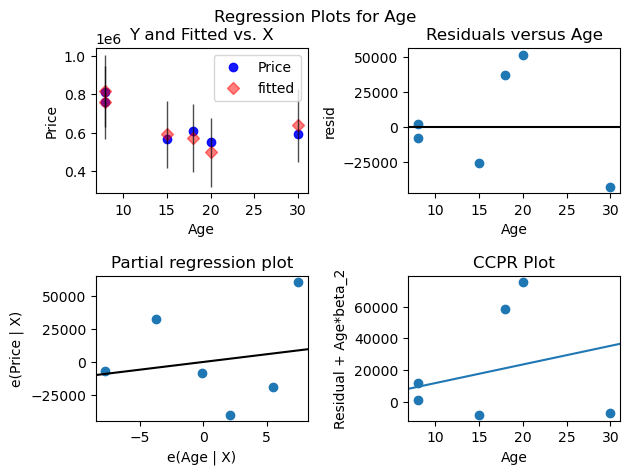

In [92]:
sm.graphics.plot_regress_exog(model_mul,'Age')

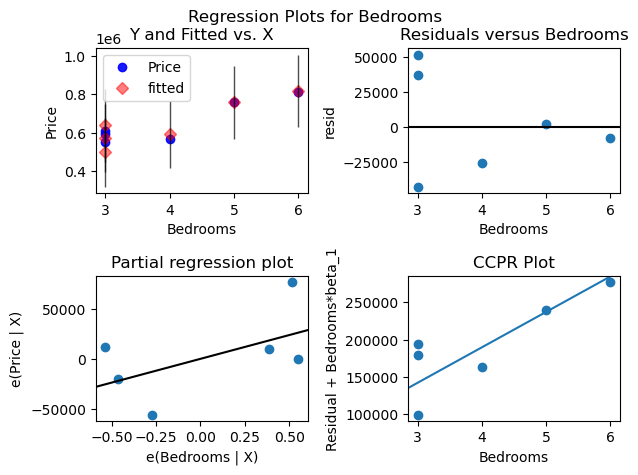

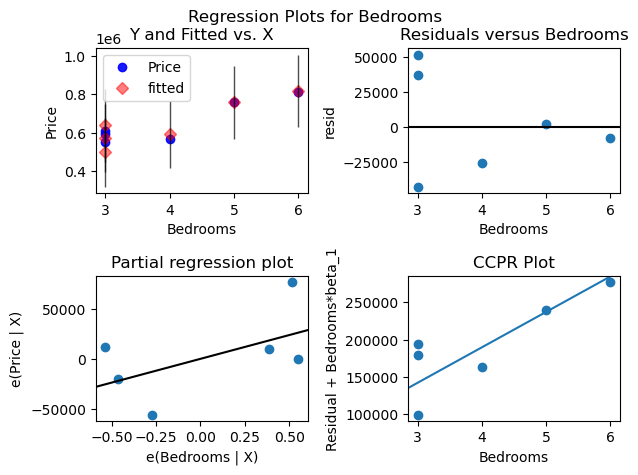

In [93]:
sm.graphics.plot_regress_exog(model_mul,'Bedrooms')

## EXP3. 
### Validating Simple linear regression using t, F and p- test. 

4. Developing confidence interval and testing the model simple and multiple regression.

5. Multiple regression: estimation of parameters, fitting of the model, error analysis, model validation, variable selection and testing.

6. Problem of multicollinearity and, determination of VIF. 

7. Diagnostic measures and outliers detection, Durbin Watson test,  variable selection and model building 

8.  Fitting of nonlinear regression model.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df

In [16]:
y= df['Sales']
TV = df[['TV']]
Radio = df[['Radio']]
Newspaper = df[['Newspaper']]

In [286]:
df = pd.read_excel('Sales_data.xlsx')
df

,S. N,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [291]:
a , b = curve_fit(cubic_func,df.index, df['Sales'])
x = np.linspace(df['Sales'], df.index, 1000)
y = cubic_func(x,*a)

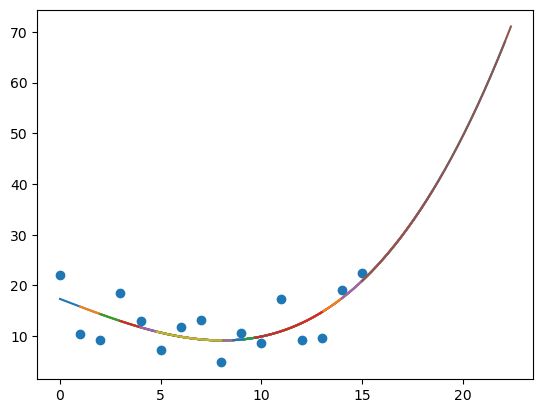

In [292]:
plt.scatter(df.index, df['Sales'])
plt.plot(x, y)
plt.show()

In [19]:
model = LinearRegression()
model.fit(TV, y) # fitting of model
print ('Alpha/ Intercept: ',model.intercept_, '\nBeta/ Slope: ', model.coef_[0])

Alpha/ Intercept:  6.815427538794575 
Beta/ Slope:  0.0538605654376747


In [34]:
pred = model.predict(TV)
pred

array([19.20874365,  9.2122227 ,  7.74182926, 14.9753032 , 16.55341777,
        7.28401446,  9.91241005, 13.2894675 ,  7.2786284 , 17.57676851,
       10.37561091, 18.37929094,  8.097309  , 12.06683267, 17.80836894,
       17.33978203])

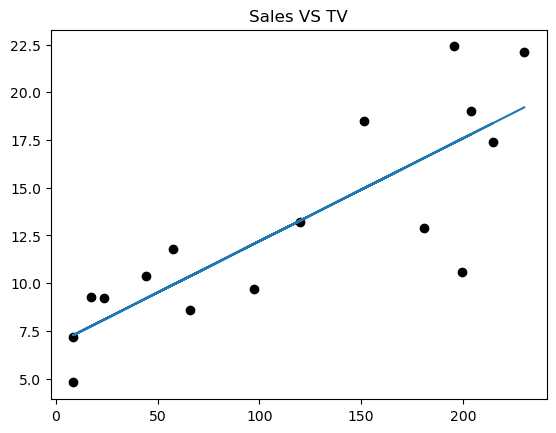

In [39]:
plt.scatter(TV, y, color= 'Black')
plt.plot(TV, pred)
plt.title(label= 'Sales VS TV')
plt.show()

### checking the accuracy of the model

In [40]:
# R2 
r2 = r2_score(y, pred)
print("R_Square: ", r2)

R_Square:  0.6876241989696272


In [44]:
# Adjusted R-square
n = len(y)
p = TV.shape[1]
adj_r2 = 1- (((1- r2) *(n-1))/(n - p - 1))
print("Adjusted R-Square: ", adj_r2)

Adjusted R-Square:  0.665311641753172


## Y = 6.81 + 0.053*TV
#### Model Interpretation:
- Here the model reveals that one unit increase in TV will increase avg sales by 0.053, but when the TV is constant there will be an avg increase of 6.81 in sales. 